<a href="https://colab.research.google.com/github/20188202010/OM_Puzzles/blob/master/OM_A2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment-2: Manifold Learning

The objective of this assignment is to apply the concepts you have learned in class on Manifold Learning and Spectral Clustering. 

## Instructions
  - For each question you need to write the sub-problem formulation in markdown. 
  - Ensure that this notebook runs without errors when the cells are run in sequence.
  - Plagiarism will not be tolerated.
  - Use only `python3` to run your code.
  - If you are facing issues running the notebook on your local system. Use google collab to run the notebook online. To run the notebook online, go to [google collab](!https://colab.research.google.com/notebooks/intro.ipynb). Go to `File  -> Upload Notebook` and import the notebook file.

__NOTE__: If you use online platforms, you will have to upload `swissroll.dat` file separately and change the path in the code cell which loads the data.

## Submission  
- Rename the notebook to `<roll_number>.ipynb` and submit **ONLY** the notebook file on moodle.

## Problems 
 - Question 1: Spectral Clustering (10 marks)
 - Question 2: Manifold Visualization (10 marks)
 - Question 3: Clustering and Visualizing high-dimensional data (10 marks)
 - Question 4: Classification (10 marks)

## Deadline 
The deadline of this assignment is 27th April, 2020, 11:59 PM

In [0]:
import sys
# Install packages correctly
!{sys.executable} -m pip install numpy sklearn tensorflow keras
# Fix mpl version due to subtle API differences
!{sys.executable} -m pip install matplotlib==3.0.3

import numpy
# Allow usage of both `np` and `numpy`
np = numpy
import sklearn
import matplotlib

    ERROR: Command errored out with exit status 1:
     command: 'c:\users\chand\downloads\python.exe' -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\chand\\AppData\\Local\\Temp\\pip-install-72_duodp\\matplotlib\\setup.py'"'"'; __file__='"'"'C:\\Users\\chand\\AppData\\Local\\Temp\\pip-install-72_duodp\\matplotlib\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base 'C:\Users\chand\AppData\Local\Temp\pip-install-72_duodp\matplotlib\pip-egg-info'
         cwd: C:\Users\chand\AppData\Local\Temp\pip-install-72_duodp\matplotlib\
    Complete output (47 lines):
    Edit setup.cfg to change the build options
    
    BUILDING MATPLOTLIB
                matplotlib: yes [3.0.3]
                    python: yes [3.8.2 (tags/v3.8.2:7b3ab59, Feb 25 2020,
                            23:03:10) [MSC v.1916 64 bit (AMD64)]]
                 

  Using cached matplotlib-3.0.3.tar.gz (36.6 MB)


# Question 1: Spectral Clustering

Implement spectral clustering and evaluate on the given concentric circles dataset for this question.

## Part 1: Implementation
Implement spectral clustering function from scratch (for two clusters), taking as input the dataset. It must return the predicted clustering. Assume that the graph constructed is a fully connected graph. Use the normalized graph laplacian for this case.



### Steps:
- Construct a K-nearest neighbours graph
- Find the degree matrix
- Compute $L = D - A$
- Compute Normalized Laplacian $N = D^(-0.5)*L*D^(-0.5)$
- Find second smallest eigen value and corresponding eigen vector of N
- Assign clusters according to sign of values in the second smallest eigen vector

In [0]:
from sklearn.neighbors import kneighbors_graph
from sklearn.neighbors import radius_neighbors_graph

In [0]:
# Part 1: Spectral Clustering

In [0]:
def findKnn_graph(k,d):
#     print(f'in knn data {d.shape}')
    # include_self - each sample as the first nearest neighbor to itself or not, here not is chosen
    A = kneighbors_graph(d, k, mode='distance',  include_self=False)
    return A.toarray()

In [0]:
def spectral_clustering(X, k,normalize=True):
    """Args:
    X: numpy.array [num_samples, input_dim]

    Returns:
    Y_pred: numpy.array [num_samples]
    array of cluster labels
    """
    num_samples, input_dim = X.shape
    
    #construct similarity (adjacency matrix)

    adjacency = findKnn_graph(k, X)
    
    #find degree matrix 
    rowsum =  np.sum(adjacency, axis=1)
    degree = np.zeros((num_samples,num_samples))

    np.fill_diagonal(degree,rowsum)
    
    #find laplacian
    L = degree - adjacency
    
    if normalize:
        #normalize laplacian
        from scipy.linalg import fractional_matrix_power
        D_half = fractional_matrix_power(degree, -0.5)
        L_n = np.matmul(np.matmul(D_half,L),D_half)
        val, vec = np.linalg.eig(L_n)
        
    if not normalize:
        val, vec = np.linalg.eig(L)
        
    #find eigen values, eigen vectors
    
    #sort the eigen values and vectors
    vec = vec[:,np.argsort(val)] #smallest to largest
    val = val[np.argsort(val)]

    #take the second smallest eigen vector
    second_smallest_eval = val[1] 
    second_smallest_evec = vec[:,1]

    #compute Y_preds
    Y_pred = np.array([0 if x>=0 else 1 for x in second_smallest_evec])

    return Y_pred

## Part 2: Clustering concentric circles
Perform spectral clustering on the concentric circles dataset. Visualize the result by plotting it on a 2-d graph. Use different colours for different clusters.

In [0]:
# DO NOT EDIT

from sklearn.datasets import make_circles 

CX, CY = make_circles(n_samples=200, shuffle=True,noise=0.05, random_state=1337, factor=0.5)
# CX: input data points [n_samples, 2]
# CY: true clusters [n_samples]

In [0]:
import pandas as pd
def do_clustering(CX, CY, k):
    Y_pred = spectral_clustering(CX, k)
    d = {'x':CX[:,0],'y':CX[:,1],'cluster':CY,'preds':Y_pred}
    circles_df = pd.DataFrame(data=d)
    c1 = circles_df[circles_df['cluster']==0]
    c2 = circles_df[circles_df['cluster']==1]

    c1_p = circles_df[circles_df['preds']==0]
    c2_p = circles_df[circles_df['preds']==1]
    
    return c1, c2, c1_p,c2_p, circles_df

In [0]:
# Part 2: Perform Spectral Clustering on the concentric circles dataset
# Plot using colors from CY (true clusters) and CY_pred (predicted clusters)
# Code in this cell should plot 2 subplots (true labels and predicted labels)
import matplotlib.pyplot as plt 
def plot(CX, CY, k):
    c1, c2, c1_p, c2_p,_ = do_clustering(CX, CY, k)
    
    fig, ax = plt.subplots(2, figsize=(5,6)) #width x height
       
    ax[0].scatter(c1['x'],c1['y'],c="red")
    ax[0].scatter(c2['x'],c2['y'],c="blue")
    ax[0].title.set_text('Original')
    ax[1].scatter(c1_p['x'],c1_p['y'],c="red")
    ax[1].scatter(c2_p['x'],c2_p['y'],c="blue")
    ax[1].title.set_text('Spectral Clustering')


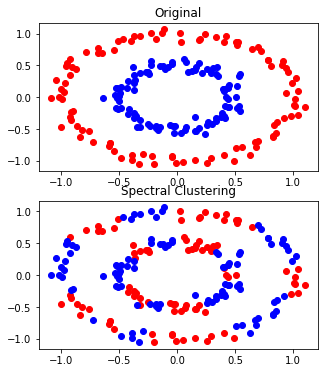

In [0]:
k = 198
plot(CX, CY, k)

## Part 3: Evaluate accuracy
Evaluate the accuracy of the clustering by comparing it with the true labels. Create two subplots (true vs predicted) with the color of each point showing the cluster label.

In [0]:
# Part 3: Report the accuracy of clustering
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
_,_,_,_, circles_df = do_clustering(CX, CY,k)
ac = accuracy_score(circles_df['cluster'],circles_df['preds'])
cm = confusion_matrix(circles_df['cluster'],circles_df['preds'])
print(f'Accuracy: {ac*100}%')

Accuracy: 53.0%




---



# Question 2: Manifold Visualization
Implement the various manifold learning methods and visualize the given datasets.


## Part 1: MDS
Implement Multi-Dimensional Scaling

### Steps:
- Find pairwise euclidean distance between all points, let this be $D$
- Find a kernel $K$ by centering $D$ as follows:
    - Let $e = [1, 1, ..., 1].T $ as a $n\_samples * 1$ vector.
    - Find $H = I - (e.e.T)*(1/n\_samples)$
    - Find $K = -0.5*H*D*H$
- Find eigen values and eigen vectors of $K$
- Choose $p$ largest eigen values and corresponding eigen vectors (let it be $V$), where $p = output\_dim$
- Compute square root of the $p$ largest eigen values, let it be $\lambda$ and construct a diagonal matrix with them.
- Find $Y = $$\lambda$$ *V.T$

In [0]:
from sklearn.metrics import pairwise_distances #MDS
from sklearn.utils.graph_shortest_path import graph_shortest_path #ISOMAP
from sklearn.neighbors import NearestNeighbors #LLE

In [0]:
def find_D(X):
    N = pairwise_distances(X)
    return N

In [0]:
# Part 1: MDS
def MDS(X, k, output_dim=2):
    """Args:
    X: numpy.array [n_samples, input_dim]
    k: number of nearest neighbours to construct the knn graph
    output_dim: dimension of output data

    Returns:
    Y: numpy.array [n_samples, output_dim]
    """
  # Your code here
    #find pairwise distance graph
    D = find_D(X)    
   
    #make kernel matrix
    e = np.ones((1, X.shape[0]))
    I = np.identity(X.shape[0])

    #find H
    H = I - np.dot(e, e.T)/X.shape[0]
    K = -np.matmul(np.matmul(H, D), H)/2
    
    #find eigen values vectors
    val, vec = np.linalg.eig(K)
    vec = vec[:,np.argsort(val)]
    
    #sort eigen values vectors
    val = val[np.argsort(val)] #ascending order smallest to largest
    
    #select top p values
    top_p_vals = val[-output_dim:]
    sqrt_top_p = np.sqrt(top_p_vals)
    lambda_hat = np.zeros((output_dim, output_dim))
    np.fill_diagonal(lambda_hat, sqrt_top_p)
    V = vec[:, -output_dim:]

    #compute Y
    Y = lambda_hat@V.T
    return Y.T

## Part 2: LLE
Implement Locally Linear Embedding function

### Steps:
- Find $k$ nearest neighbour graph, $K$
- To find $W$,
    - For all points in $X$, 
        - find indices of its $k$ nearest neighbours
        - construct a matrix $Z$ which is defined as $X[idx: ]$ where $idx$ is indices of $k$ nearest neighbours of $X$
        - subtract $Xi$ from every column of $Z$
        - compute $C = Z*Z.T$
        - solve for $ w = C^-1$
        - set $ih$row of $W$ as $w/sum(w)$
- To find $Y$
    - Calculate $M = I - W$
    - Find eigen values and eigen vectors of $M.T*M$
    - Exclude the smallest eigen vector and then choose $p$ smallest eigen vectors, where $p = output\_dim$
    - Set $ith$ row of $Y$ as $p+1th$ smallest eigen vector

In [0]:
def findNeighbours(X, k):
    neigh = NearestNeighbors(n_neighbors=k)
    model = neigh.fit(X)
    n_indices = neigh.kneighbors(X, return_distance =False)
    return n_indices

In [0]:
# Part 2: LLE

def LLE(X, k, output_dim=2):
    """Args:
    X: numpy.array [n_samples, input_dim]
    k: number of nearest neighbours to construct the knn graph
    output_dim: dimension of output data

    Returns:
    Y: numpy.array [n_samples, output_dim]
    """
    # Your code here
    
    # make a knearest graph
    K = findNeighbours( X, k)
    
    #solve for W
    n = X.shape[0]
    W = np.zeros((n, n))
    for i in range(n):
        i_neighbours = K[i, :] # k x 1
        Z_ =  X[i_neighbours, :] # k x 3
        Xi = X[i,: ]
        Z = np.subtract(Z_ , Xi)
        C = Z @ Z.T

        w = np.linalg.pinv(C)

        W[i, i_neighbours] = np.sum(w, axis=1)/np.sum(w)
    
    #solve for Y
    I = np.identity(n)
    m = np.subtract(I, W)
    val, vec = np.linalg.eig(m.T @ m)
    
    
    vec = vec[:,np.argsort(val)]  #Smallest to largest
    val = val[np.argsort(val)] 

    Y = vec[:, 1:output_dim+1]
    
    return Y

## Part 3: ISOMAP
Implement Isomap Visualization  

### Steps:
- Find $k$ nearest neighbour graph
- Compute shortest distance using graph let this be $D$
- Find a kernel $K$ by centering $D$ as follows:
    - Let $e = [1, 1, ..., 1].T $ as a $n\_samples * 1$ vector.
    - Find $H = I - (e.e.T)*(1/n\_samples)$
    - Find $K = -0.5*H*D*H$
- Find eigen values and eigen vectors of $K$
- Choose $p$ largest eigen values and corresponding eigen vectors (let it be $V$), where $p = output\_dim$
- Compute square root of the $p$ largest eigen values, let it be $\lambda$ and construct a diagonal matrix with them.
- Find $Y = $$\lambda$$ *V.T$

In [0]:
# Part 3: Isomap

def ISOMAP(X, k, output_dim=2):
    """Args:
    X: numpy.array [n_samples, input_dim]
    k: number of nearest neighbours to construct the knn graph
    output_dim: dimension of output data

    Returns:
    Y: numpy.array [n_samples, output_dim]
    """
    # Your code here
    # make a knearest graph
    K = findKnn_graph(k, X)
    
    #compute shortest distance between all points
    D = graph_shortest_path(K, directed = False, method = 'D')
    
    #make kernel matrix
    e = np.ones((1, X.shape[0]))
    I = np.identity(X.shape[0])
    H = I - np.dot(e, e.T)/X.shape[0]
    K = -np.matmul(np.matmul(H, D), H)/2
    
    #find eigen values vectors
    val, vec = np.linalg.eig(K)
    
    vec = vec[:,np.argsort(val)]
    val = val[np.argsort(val)] #ascending order smallest to largest
    
    top_p_vals = val[-output_dim:]
    sqrt_top_p = np.sqrt(top_p_vals)
    lambda_hat = np.zeros((output_dim, output_dim))
    np.fill_diagonal(lambda_hat, sqrt_top_p)
    V = vec[:, -output_dim:]

    #find Y
    Y = lambda_hat@V.T
    return Y.T

## Part 3: Manifold Visualization
Visualize the S-shaped 3-d dataset using the MDS, ISOMAP, LLE

In [0]:
# DO NOT EDIT

from sklearn import manifold, datasets

SX, St = datasets.make_s_curve(n_samples=1000, random_state=1337)
# SX: input data [n_samples, 3]
# St: univariate position along manifold [n_samples], use for coloring the plots

The code in the next cell should draw a single plot with the following subplots:
1. 3D S-shaped dataset
2. 2D Manifold learnt using MDS
3. 2D Manifold learnt using ISOMAP
4. 2D Manifold learnt using LLE

Use the `St` variable to color the points in your visualizations. Use a color spectrum, and the position along the manifold to assign the color.

<ipython-input-18-68c0cad31aee>:7: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
  ax = fig.gca(projection='3d')


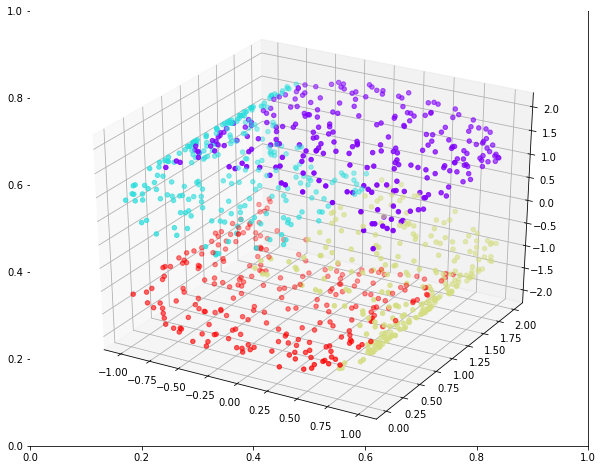

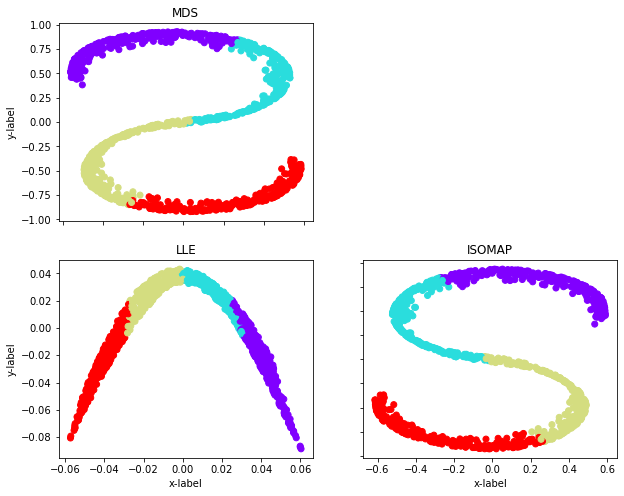

In [0]:
#  Visualization code here
def plot(SX, St):
    colorize = dict(c=St, cmap=plt.cm.get_cmap('rainbow', 4))  
    
    fig, ax = plt.subplots(figsize=(10,8))
    x,y,z = SX.T
    ax = fig.gca(projection='3d')
    ax.scatter3D(SX[:, 0], SX[:, 1], SX[:, 2], **colorize)
    
    
    Y_MDS = MDS(SX, 500)
    Y_LLE = LLE(SX, 30)
    Y_ISO = ISOMAP(SX, 500)
    
    
    fig, axs = plt.subplots(2, 2, figsize=(10,8))

    axs[0, 0].scatter(Y_MDS[:, 0], Y_MDS[:, 1], **colorize)
    axs[0, 0].set_title('MDS')
    axs[1, 0].scatter(Y_LLE[:, 0], Y_LLE[:, 1], **colorize)
    axs[1, 0].set_title('LLE')
    axs[1, 1].scatter(Y_ISO[:, 0], Y_ISO[:, 1], **colorize)
    axs[1, 1].set_title('ISOMAP')
    fig.delaxes(axs[0,1])
    for ax in axs.flat:
        ax.set(xlabel='x-label', ylabel='y-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
    for ax in axs.flat:
        ax.label_outer()
    
plot(SX, St)


# Question 3: Clustering and Visualizing high-dimensional data
Perform k-means and spectral clustering on the Swiss roll dataset and visualize using the above 3 methods. State your observations.

In [0]:
# Swiss roll dataset loading here
d = []
with open('./swissroll.dat', 'r') as dat_file:
    for line in dat_file:
        line = line.strip().split()
        line = [float(x.strip()) for x in line]
        d.append(line)
swissroll = numpy.array(d)
print (swissroll.shape)

(1600, 3)


Procedure for this question:
1. Perform spectral clustering (2 clusters) on the unchanged Swiss roll and visualize (binary colors)
2. Unwrap the manifold in 2D and visualize using
  - MDS
  - ISOMAP
  - LLE

Use the labels from the spectral clustering to color the unwrapped manifolds.

<ipython-input-20-e12db314878e>:4: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
  ax = fig.gca(projection='3d')


Text(0.5, 0.92, 'Swissroll')

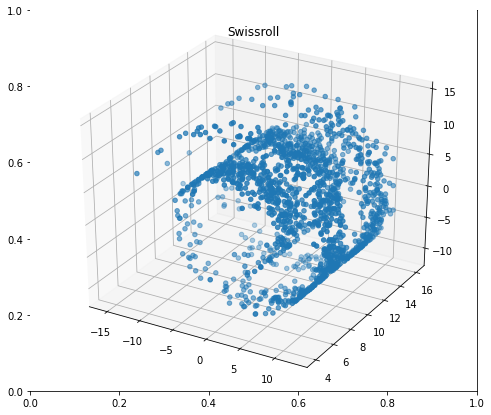

In [0]:
# CODE HERE
fig, ax = plt.subplots(figsize=(8,7))
x,y,z = swissroll.T
ax = fig.gca(projection='3d')
ax.scatter3D(x, y, z)
ax.set_title('Swissroll')

## Spectral Clustering

In [0]:
k = 198
Y_pred = spectral_clustering(swissroll, 198, normalize=False)

In [0]:
Y_pred

array([0, 0, 0, ..., 1, 1, 1])

<ipython-input-23-e7f8274d45fb>:7: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
  ax = fig.gca(projection='3d')


Text(0.5, 0.92, 'Swissroll- Spectral Clustering')

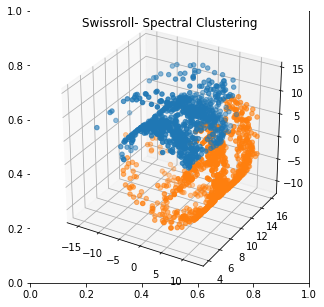

In [0]:
d = {'x':swissroll[:,0],'y':swissroll[:,1], 'z': swissroll[:,2],'cluster':Y_pred}
circles_df = pd.DataFrame(data=d)
c1 = circles_df[circles_df['cluster']==0]
c2 = circles_df[circles_df['cluster']==1]

fig, ax = plt.subplots(figsize=(5,5))
ax = fig.gca(projection='3d')
ax.scatter3D(c1['x'], c1['y'], c1['z'])
ax.scatter3D(c2['x'], c2['y'], c2['z'])     
ax.set_title('Swissroll- Spectral Clustering')

## MDS

<ipython-input-24-9b9817c8f389>:8: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
  ax = fig.gca(projection='3d')


Text(0.5, 0.92, 'Swissroll- MDS')

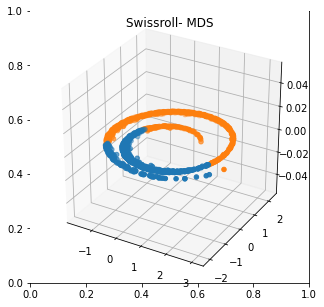

In [0]:
swissroll_mds =  MDS(swissroll, 500)
d = {'x':swissroll_mds[:,0],'y':swissroll_mds[:,1],'cluster':Y_pred}
circles_df = pd.DataFrame(data=d)
c1 = circles_df[circles_df['cluster']==0]
c2 = circles_df[circles_df['cluster']==1]

fig, ax = plt.subplots(figsize=(5,5))
ax = fig.gca(projection='3d')
ax.scatter(c1['x'], c1['y'])
ax.scatter(c2['x'], c2['y'])
ax.set_title('Swissroll- MDS')

### Observations:
- MDS preserves euclidean distance, it does not consider distance on the manifold
- In the 2-d embedding also, pairwise euclidean distances are preserved

## LLE

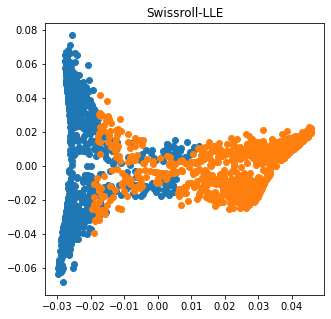

In [0]:
swissroll_lle =  LLE(swissroll, 70)

d = {'x':swissroll_lle[:,0],'y':swissroll_lle[:,1],'cluster':Y_pred}
circles_df = pd.DataFrame(data=d)
c1 = circles_df[circles_df['cluster']==0]
c2 = circles_df[circles_df['cluster']==1]

fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(c1['x'], c1['y'])
ax.scatter(c2['x'], c2['y'])
ax.set_title('Swissroll-LLE')
plt.show()

### Observations:
- LLE preserves the topology of the data
- Points closer in the original higher dimension remain closer in lower dimension also
- It preserves the neighbourhood of a point

## ISOMAP

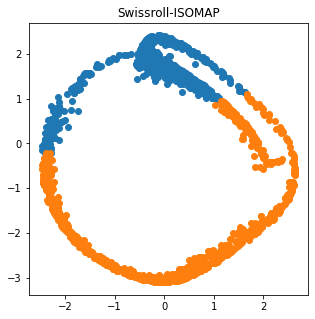

In [0]:
swissroll_iso =  ISOMAP(swissroll, 70)

d = {'x':swissroll_iso[:,0],'y':swissroll_iso[:,1],'cluster':Y_pred}
circles_df = pd.DataFrame(data=d)
c1 = circles_df[circles_df['cluster']==0]
c2 = circles_df[circles_df['cluster']==1]

fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(c1['x'], c1['y'])
ax.scatter(c2['x'], c2['y'])
ax.set_title('Swissroll-ISOMAP')
plt.show()

### Observations:
- Isomap preserves the geodesic distance between points
- It uses the local neighbourhood information to create a global similarity matrix.
- Thus in the lower dimension representation, it preserves both local and global similarities



---



# Question 4: Classification

Perform classification using a machine learning algorithm of your choice. Use 6k images from CIFAR-10 dataset.(5k images for training and 1k images for testing.)


*   Do dimensionality reduction on the dataset using PCA and ISOMAP.
*   Apply the classification algorithm.
*   Compare the results by changing the dimensionality of the data.
*   Use F1-score as metric.
*   Approach: Reduce the dimensionality into any two dimensions(of your choice) which are less than the initial dimensionality of the data using PCA and ISOMAP. Compare the performance metrics(F1-score) for the low dimensional data.



In [0]:
# Code for loading CIFAR-10 dataset.
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train = X_train[:5000].reshape([5000,32*32*3])
y_train = y_train[:5000]
X_test = X_test[:1000].reshape([1000,32*32*3])
y_test = y_test[:1000]
# Initial dimensionality/number of features (32*32*3) = 3072.

Using TensorFlow backend.


In [0]:
from sklearn.decomposition import PCA
def reductionUsingPCA(X, k, output_dim):
    """Args:
    X: numpy.array [n_samples, input_dim]
    k: number of nearest neighbours to construct the knn graph
    output_dim: dimension of output data

    Returns:
    pca_X: numpy.array [n_samples, output_dim]
    """
  # Enter your code here
    G = kneighbors_graph(X, k, mode='distance', include_self=False).toarray()
    pca = PCA(n_components=output_dim)
    pca_X = pca.fit_transform(G)
    return pca_X

In [0]:
from sklearn.manifold import Isomap
def reductionUsingISOMAP(X, k, output_dim):
    """Args:
    X: numpy.array [n_samples, input_dim]
    k: number of nearest neighbours to construct the knn graph
    output_dim: dimension of output data

    Returns:
    isomap_X: numpy.array [n_samples, output_dim]
    """
    # Enter your code here
    model = Isomap(n_neighbors=k, n_components=output_dim)
    isomap_X = model.fit_transform(X)
    return isomap_X

In [0]:
# Classification Algorithm 
# Extra functions here
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
def classification(X_train, Y_train, X_test,n_classes):
    """Args:
    X: numpy.array [n_samples, input_dim]
    n_classes: number of classes

    Returns:
    labels: numpy_array [n_samples]
    """

  # Your code here
    clf = RandomForestClassifier(n_estimators= 10, max_depth=2, random_state=42)
    clf.fit(X_train, Y_train)
    labels = clf.predict(X_test)
    return labels


In [0]:
from sklearn.metrics import f1_score
def F1_score(y_true, y_pred):
    """Args:
    y_true: numpy.array [n_samples] , ground truth value
    y_pred: numpy.array [n_samples] , predicted value by classifier

    Returns:
    score: float, f1-score
    """
    score = f1_score(y_true, y_pred, average='macro')
    return score

## reduced dimension - 300, k - 100

### PCA

In [0]:
X_train_pca = reductionUsingPCA(X_train, 100, 300)
print('train pca done')
X_test_pca = reductionUsingPCA(X_test, 100, 300)
print('test pca done')
labels = classification(X_train_pca, y_train,X_test_pca,10 )
print('got labels')

train pca done
test pca done
got labels


<ipython-input-30-a1953a60b7c2>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, Y_train)


In [0]:
F1_score(y_test, labels)

0.10491561119086464

### ISOMAP

In [0]:
X_train_iso = reductionUsingISOMAP(X_train, 100, 300)
print('train iso done')
X_test_iso = reductionUsingISOMAP(X_test, 100, 300)
print('test iso done')
labels = classification(X_train_iso, y_train,X_test_iso,10 )
print('got labels')

train iso done
test iso done
got labels


<ipython-input-30-a1953a60b7c2>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, Y_train)


In [0]:
F1_score(y_test, labels)

0.10080366834022896

## reduced dimension - 100, k - 500

### PCA

In [0]:
X_train_pca = reductionUsingPCA(X_train, 500, 100)
print('train pca done')
X_test_pca = reductionUsingPCA(X_test, 500, 100)
print('test pca done')
labels = classification(X_train_pca, y_train,X_test_pca,10 )
print('got labels')

In [0]:
F1_score(y_test, labels)

### ISOMAP

In [0]:
X_train_iso = reductionUsingISOMAP(X_train, 500, 100)
print('train iso done')
X_test_iso = reductionUsingISOMAP(X_test, 500, 100)
print('test iso done')
labels = classification(X_train_iso, y_train,X_test_iso,10 )
print('got labels')

In [0]:
F1_score(y_test, labels)